In [1]:
import pandas as pd

data = pd.read_json('processtimes.json')

data

,StationGroup,StationName,UnitIdType,SerialNumber,Value,TimeStamp
0,StationGroup6,StationName6,UnitIdType2,10,0.202,2024-10-23 17:19:37.111000+02:00
1,StationGroup1,StationName1,UnitIdType1,1,0.181,2024-10-23 17:19:37.079000+02:00
2,StationGroup1,StationName1,UnitIdType1,14,0.130,2024-10-23 17:19:37.079000+02:00
3,StationGroup6,StationName6,UnitIdType2,20,0.540,2024-10-23 17:19:37.111000+02:00
4,StationGroup1,StationName9,UnitIdType1,27,0.110,2024-10-23 17:19:37.637000+02:00
...,...,...,...,...,...,...
114397,StationGroup84,StationName144,UnitIdType5,26410,15.409,2024-10-23 18:22:16.624000+02:00
114398,StationGroup11,StationName85,UnitIdType2,26207,2.188,2024-10-23 18:22:29.926000+02:00
114399,StationGroup31,StationName40,UnitIdType1,26072,0.084,2024-10-23 18:22:32.147000+02:00
114400,StationGroup31,StationName42,UnitIdType1,26122,0.084,2024-10-23 18:22:32.172000+02:00


# Select only one group

I chose StationGroup63 because it has an easy to interpret amount of stations, and therefore I think less confusion at the beginning

In [2]:
data_grouped_by_stationgroup = data.groupby('StationGroup')['StationName'].nunique()

data_grouped_by_stationgroup.sort_values(ascending=False).head(20)

StationGroup
StationGroup97    12
StationGroup58    11
StationGroup44     8
StationGroup28     6
StationGroup6      6
StationGroup11     6
StationGroup94     5
StationGroup63     4
StationGroup22     4
StationGroup25     4
StationGroup85     4
StationGroup34     4
StationGroup18     4
StationGroup42     4
StationGroup96     4
StationGroup41     3
StationGroup75     3
StationGroup31     3
StationGroup29     3
StationGroup62     3
Name: StationName, dtype: int64

In [3]:
data_stationgroup63 = data[data['StationGroup'] == 'StationGroup63']

data_stationgroup63

,StationGroup,StationName,UnitIdType,SerialNumber,Value,TimeStamp
651,StationGroup63,StationName98,UnitIdType2,97,8.837,2024-10-23 17:19:52.525000+02:00
660,StationGroup63,StationName98,UnitIdType2,35,8.999,2024-10-23 17:19:52.525000+02:00
671,StationGroup63,StationName98,UnitIdType2,38,9.238,2024-10-23 17:19:52.525000+02:00
699,StationGroup63,StationName106,UnitIdType2,10,8.930,2024-10-23 17:19:53.648000+02:00
704,StationGroup63,StationName106,UnitIdType2,20,9.059,2024-10-23 17:19:53.648000+02:00
...,...,...,...,...,...,...
114001,StationGroup63,StationName106,UnitIdType2,25969,9.043,2024-10-23 18:22:06.990000+02:00
114003,StationGroup63,StationName106,UnitIdType2,25972,9.163,2024-10-23 18:22:06.990000+02:00
114250,StationGroup63,StationName98,UnitIdType2,26026,8.818,2024-10-23 18:22:15.930000+02:00
114254,StationGroup63,StationName98,UnitIdType2,26027,8.985,2024-10-23 18:22:15.930000+02:00


# Find out what UnitIdType means

In [4]:


data_stationgroup97_by_idType = data_stationgroup63.groupby("UnitIdType").count()

data_stationgroup97_by_idType

,StationGroup,StationName,SerialNumber,Value,TimeStamp
UnitIdType,,,,,
UnitIdType2,1081,1081,1081,1081,1081


# Visualize the Process times

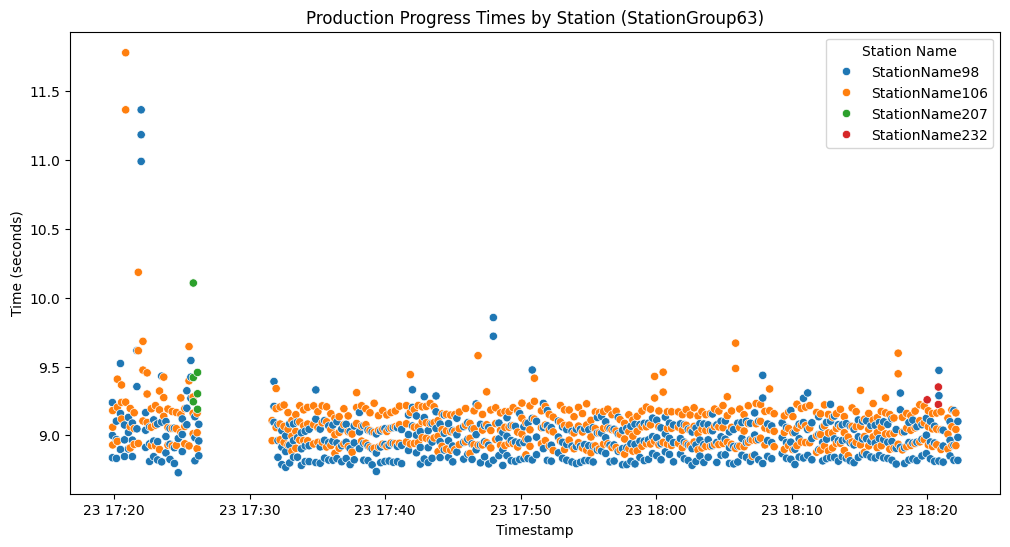

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_stationgroup63, x='TimeStamp', y='Value', hue='StationName')
plt.title('Production Progress Times by Station (StationGroup63)')
plt.xlabel('Timestamp')
plt.ylabel('Time (seconds)')
plt.legend(title='Station Name')
plt.show()


# Check if the serial number is logged correctly with each step -> Serial Number should appear at least 4 times -> 4 stations in the group

In [6]:
data_stationgroup63.groupby("SerialNumber")["Value"].count()

SerialNumber
10       1
20       1
33       1
35       1
38       1
        ..
25969    1
25972    1
26026    1
26027    1
26028    1
Name: Value, Length: 1081, dtype: int64

# Result: It doesn't. That means an item is not trackable?

In [7]:
data_stationgroup63.groupby("StationName")['Value'].median()

StationName
StationName106    9.059
StationName207    9.361
StationName232    9.258
StationName98     8.962
Name: Value, dtype: float64

In [8]:
data_stationgroup63.head(50)

,StationGroup,StationName,UnitIdType,SerialNumber,Value,TimeStamp
651,StationGroup63,StationName98,UnitIdType2,97,8.837,2024-10-23 17:19:52.525000+02:00
660,StationGroup63,StationName98,UnitIdType2,35,8.999,2024-10-23 17:19:52.525000+02:00
671,StationGroup63,StationName98,UnitIdType2,38,9.238,2024-10-23 17:19:52.525000+02:00
699,StationGroup63,StationName106,UnitIdType2,10,8.930,2024-10-23 17:19:53.648000+02:00
704,StationGroup63,StationName106,UnitIdType2,20,9.059,2024-10-23 17:19:53.648000+02:00
711,StationGroup63,StationName106,UnitIdType2,33,9.180,2024-10-23 17:19:53.648000+02:00
1200,StationGroup63,StationName98,UnitIdType2,263,8.832,2024-10-23 17:20:10.129000+02:00
1204,StationGroup63,StationName98,UnitIdType2,281,8.969,2024-10-23 17:20:10.129000+02:00
1207,StationGroup63,StationName98,UnitIdType2,290,9.103,2024-10-23 17:20:10.129000+02:00
1343,StationGroup63,StationName106,UnitIdType2,521,8.956,2024-10-23 17:20:14.415000+02:00


In [9]:
data_timestampIndex = data_stationgroup63.set_index("TimeStamp")

data_tI_grouped = data_timestampIndex.groupby([pd.Grouper(freq='5min'), 'StationName']).agg({'Value':'mean'}).reset_index()

data_tI_grouped

,TimeStamp,StationName,Value
0,2024-10-23 17:15:00+02:00,StationName106,9.056333
1,2024-10-23 17:15:00+02:00,StationName98,9.024667
2,2024-10-23 17:20:00+02:00,StationName106,9.278750
3,2024-10-23 17:20:00+02:00,StationName98,9.151979
4,2024-10-23 17:25:00+02:00,StationName106,9.141000
5,2024-10-23 17:25:00+02:00,StationName207,9.453167
6,2024-10-23 17:25:00+02:00,StationName98,9.110933
7,2024-10-23 17:30:00+02:00,StationName106,9.072594
8,2024-10-23 17:30:00+02:00,StationName98,8.971485
9,2024-10-23 17:35:00+02:00,StationName106,9.055149


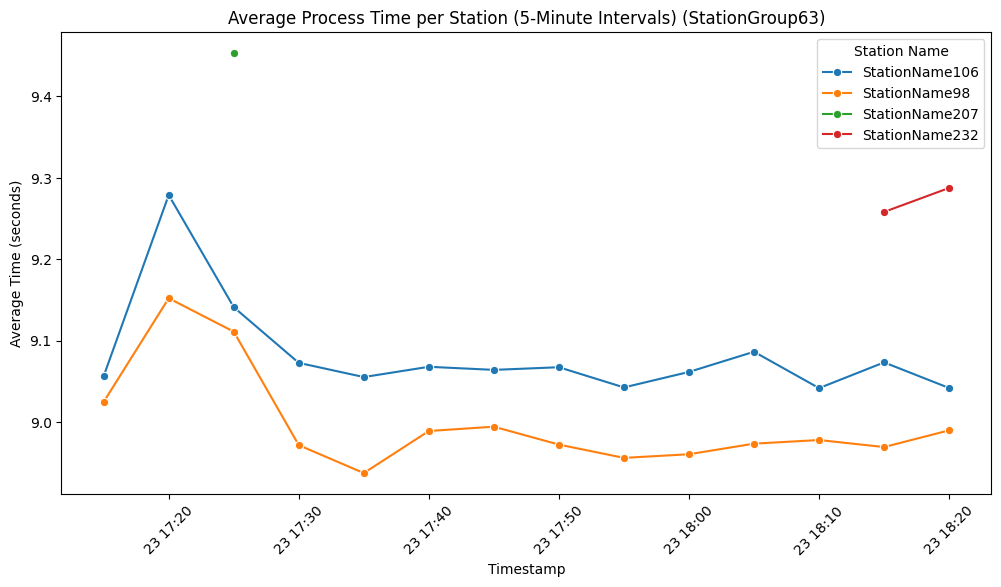

In [10]:
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_tI_grouped, x='TimeStamp', y='Value', hue='StationName', marker='o')
plt.title('Average Process Time per Station (5-Minute Intervals) (StationGroup63)')
plt.xlabel('Timestamp')
plt.ylabel('Average Time (seconds)')
plt.legend(title='Station Name')
plt.xticks(rotation=45)
plt.show()

In [13]:
data_new = data.groupby("SerialNumber")["Value"].count()

data_new.head(50)

SerialNumber
1      9
2      3
3      2
4      2
5      5
6      2
7      5
8      2
9      5
10     7
11     2
12     2
13     3
14     9
15     2
16     2
17     9
18     1
19     9
20     7
21     5
22    15
23     3
24     5
25     5
26     3
27     9
28     3
29     9
30    12
31     1
32     4
33     7
34     1
35     6
36     2
37     6
38     6
39     6
40     6
41     6
42     6
43     6
44     6
45     6
46     4
47     6
48    11
49     4
50     6
Name: Value, dtype: int64